In [1]:
%pylab inline
import numpy as np
from matplotlib.patches import Circle
from shapely.geometry import box, Polygon, Point, LineString
from scipy.spatial import Voronoi, voronoi_plot_2d

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams['font.family'] = 'Open Sans'

In [3]:
# Population sizes of the regions in the Venn diagram

# Just A
# A - B - C
just_a = 70

# Just B
# B - C - A
just_b = 17

# Just C
# C - B - A
just_c = 85

# A ^ B
a_intersection_b = 3

# A ^ C
a_intersection_c = 5

# B ^ C
b_intersection_c = 60

# A ^ B ^ C
a_intersection_b_intersection_c = 15


In [4]:
a_x, a_y, a_r = 0,1,1.2
b_x, b_y, b_r = -.5,0,1.2
c_x, c_y, c_r = .5,0,1.2

A = Point(a_x, a_y).buffer(a_r)
B = Point(b_x, b_y).buffer(b_r)
C = Point(c_x, c_y).buffer(c_r)

In [5]:
def random_points_within(shapely_poly, num_points, min_distance_from_edge=0.05):
    shapely_poly = shapely_poly.buffer(-1*min_distance_from_edge)
    min_x, min_y, max_x, max_y = shapely_poly.bounds

    points = []

    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(shapely_poly)):
            points.append(np.array(random_point.coords.xy).T)

    points = np.vstack(points)
    return points

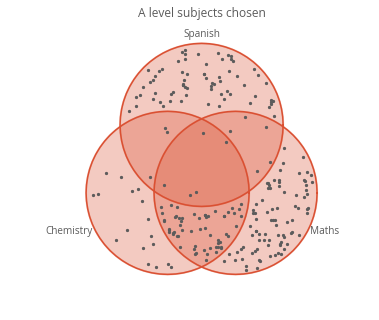

In [17]:
# plot A
plt.plot(np.array(A.boundary.coords.xy).T[:,0], np.array(A.boundary.coords.xy).T[:,1], color=(0.855,0.314,0.196,1.0))
plt.gca().add_patch(Circle((a_x, a_y), a_r, zorder=0, lw=2, edgecolor=(0.855,0.314,0.196,1.0), color=(0.855,0.314,0.196,.3)))
plt.text(0,2.3,"Spanish", ha='center', color=(.36,.36,.36))

# plot B
plt.plot(np.array(B.boundary.coords.xy).T[:,0], np.array(B.boundary.coords.xy).T[:,1], color=(0.855,0.314,0.196,1.0))
plt.gca().add_patch(Circle((b_x, b_y), b_r, zorder=0, lw=2, edgecolor=(0.855,0.314,0.196,1.0), color=(0.855,0.314,0.196,.3)))
plt.text(-1.6,-0.6,"Chemistry", ha='right', color=(.36,.36,.36))

# plot C
plt.plot(np.array(C.boundary.coords.xy).T[:,0], np.array(C.boundary.coords.xy).T[:,1], color=(0.855,0.314,0.196,1.0))
plt.gca().add_patch(Circle((c_x, c_y), c_r, zorder=0, lw=2, edgecolor=(0.855,0.314,0.196,1.0), color=(0.855,0.314,0.196,.3)))
plt.text(1.6,-0.6,"Maths", ha='left', color=(.36,.36,.36))


# Plot the population represented by 100 dots

rand_x_range = (-2,2)
rand_y_range = (-1.5,2.5)
scatter_kwargs = {'color': (.36,.36,.36),
                  's': 5}

# Plot just A
points = random_points_within(A.difference(B).difference(C), just_a)
plt.scatter(points[:,0],points[:,1], **scatter_kwargs)
            
# plot just B
points = random_points_within(B.difference(A).difference(C), just_b)
plt.scatter(points[:,0],points[:,1], **scatter_kwargs)

# plot just C
points = random_points_within(C.difference(A).difference(B), just_c)
plt.scatter(points[:,0],points[:,1], **scatter_kwargs)

# plot A ^ B
points = random_points_within(A.intersection(B).difference(C), a_intersection_b)
plt.scatter(points[:,0],points[:,1], **scatter_kwargs)

# plot A ^ C
points = random_points_within(A.intersection(C).difference(B), a_intersection_c)
plt.scatter(points[:,0],points[:,1], **scatter_kwargs)

# plot B ^ C
points = random_points_within(B.intersection(C).difference(A), b_intersection_c)
plt.scatter(points[:,0],points[:,1], **scatter_kwargs)

# plot A ^ B ^ C
points = random_points_within(A.intersection(B).intersection(C), a_intersection_c)
plt.scatter(points[:,0],points[:,1], **scatter_kwargs)

# Fine tune the presentation of the graph
plt.axes().set_aspect('equal', 'datalim')
plt.gca().axis('off')
plt.xlim(-3.5,3.5)
plt.ylim(-1.5,2.5)
plt.gcf().set_size_inches(6,5)
plt.title('A level subjects chosen', color=(.36,.36,.36))

# Save the output
plt.savefig('unrelaxed_Venn.png', dpi=600)

# With bounded Lloyd relaxation

In [8]:
def apply_bounded_lloyd_relaxation(points, boundary, iterations=5):
    points_to_use = points.copy()

    for i in range(iterations):
        vor = Voronoi(np.vstack([points_to_use, boundary]))
        relevant_regions = vor.regions
        relevant_regions = [a for a in relevant_regions if (-1 not in a) and len(a) > 0]
        relevant_regions = [vor.regions[x] for x in vor.point_region[:len(points)]]  # Beta code
        regions_coordinates = [np.vstack([vor.vertices[x] for x in region]) for region in relevant_regions]
        region_centroids = np.array([Polygon(region).centroid.bounds[:2] for region in regions_coordinates])
        points_to_use = region_centroids

    return(points_to_use)

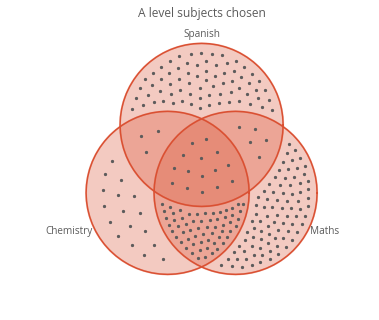

In [13]:
# plot A
plt.plot(np.array(A.boundary.coords.xy).T[:,0], np.array(A.boundary.coords.xy).T[:,1], color=(0.855,0.314,0.196,1.0))
plt.gca().add_patch(Circle((a_x, a_y), a_r, zorder=0, lw=2, edgecolor=(0.855,0.314,0.196,1.0), color=(0.855,0.314,0.196,.3)))
plt.text(0,2.3,"Spanish", ha='center', color=(.36,.36,.36))

# plot B
plt.plot(np.array(B.boundary.coords.xy).T[:,0], np.array(B.boundary.coords.xy).T[:,1], color=(0.855,0.314,0.196,1.0))
plt.gca().add_patch(Circle((b_x, b_y), b_r, zorder=0, lw=2, edgecolor=(0.855,0.314,0.196,1.0), color=(0.855,0.314,0.196,.3)))
plt.text(-1.6,-0.6,"Chemistry", ha='right', color=(.36,.36,.36))

# plot C
plt.plot(np.array(C.boundary.coords.xy).T[:,0], np.array(C.boundary.coords.xy).T[:,1], color=(0.855,0.314,0.196,1.0))
plt.gca().add_patch(Circle((c_x, c_y), c_r, zorder=0, lw=2, edgecolor=(0.855,0.314,0.196,1.0), color=(0.855,0.314,0.196,0.3)))
plt.text(1.6,-0.6,"Maths", ha='left', color=(.36,.36,.36))


# Plot the population

rand_x_range = (-2,2)
rand_y_range = (-1.5,2.5)
scatter_kwargs = {'color': (.36,.36,.36),
                  's': 5}



# Plot just A
points = random_points_within(A.difference(B).difference(C), just_a)
boundary = A.difference(B).difference(C).boundary
boundary_coordinates = np.array(boundary.coords.xy).T
relaxed_points = apply_bounded_lloyd_relaxation(points, boundary_coordinates, iterations=100)
plt.scatter(relaxed_points[:,0], relaxed_points[:,1], **scatter_kwargs)         
            

# plot just B
points = random_points_within(B.difference(A).difference(C), just_b)
boundary = B.difference(A).difference(C).boundary
boundary_coordinates = np.array(boundary.coords.xy).T
relaxed_points = apply_bounded_lloyd_relaxation(points, boundary_coordinates, iterations=100)
plt.scatter(relaxed_points[:,0], relaxed_points[:,1], **scatter_kwargs)         
            
            
# plot just C
points = random_points_within(C.difference(A).difference(B), just_c)
boundary = C.difference(B).difference(A).boundary
boundary_coordinates = np.array(boundary.coords.xy).T
relaxed_points = apply_bounded_lloyd_relaxation(points, boundary_coordinates, iterations=100)
plt.scatter(relaxed_points[:,0], relaxed_points[:,1], **scatter_kwargs)            


# plot A ^ B
points = random_points_within(A.intersection(B).difference(C), a_intersection_b)
boundary = A.intersection(B).difference(C).boundary
boundary_coordinates = np.array(boundary.coords.xy).T
relaxed_points = apply_bounded_lloyd_relaxation(points, boundary_coordinates, iterations=100)
plt.scatter(relaxed_points[:,0], relaxed_points[:,1], **scatter_kwargs)
            
# plot A ^ C
points = random_points_within(A.intersection(C).difference(B), a_intersection_c)
boundary = A.intersection(C).difference(B).boundary
boundary_coordinates = np.array(boundary.coords.xy).T
relaxed_points = apply_bounded_lloyd_relaxation(points, boundary_coordinates, iterations=100)
plt.scatter(relaxed_points[:,0], relaxed_points[:,1], **scatter_kwargs)
            
# plot B ^ C
points = random_points_within(B.intersection(C).difference(A), b_intersection_c)
boundary = B.intersection(C).difference(A).boundary
boundary_coordinates = np.array(boundary.coords.xy).T
relaxed_points = apply_bounded_lloyd_relaxation(points, boundary_coordinates, iterations=100)
plt.scatter(relaxed_points[:,0], relaxed_points[:,1], **scatter_kwargs)


# plot A ^ B ^ C
points = random_points_within(A.intersection(B).intersection(C), a_intersection_b_intersection_c)
boundary = A.intersection(B).intersection(C).boundary
boundary_coordinates = np.array(boundary.coords.xy).T
relaxed_points = apply_bounded_lloyd_relaxation(points, boundary_coordinates, iterations=100)
plt.scatter(relaxed_points[:,0], relaxed_points[:,1], **scatter_kwargs)
            

# Fine tune the presentation of the graph
plt.axes().set_aspect('equal', 'datalim')
plt.gca().axis('off')
plt.xlim(-3.5,3.5)
plt.ylim(-1.5,2.5)
plt.gcf().set_size_inches(6,5)
plt.title('A level subjects chosen', color=(.36,.36,.36))

# Save the output
plt.savefig('Venn.png', dpi=600)